## J9

### Documentation

In [103]:
Documentation = """
این کد یک تحلیل داده و ایجاد مدل برای تشخیص دیابت با استفاده از داده‌های مربوط به بیماران دیابت را انجام می‌دهد. توضیحات خط به خط:
This code performs data analysis and builds a model for diabetes detection using data related to diabetic patients. Below is a line-by-line explanation of the code:

وارد کردن کتابخانه‌های مورد نیاز از جمله NumPy برای عملیات عددی، Pandas برای کار با داده‌ها، و Matplotlib و Seaborn برای تصویرسازی.
Importing necessary libraries, including NumPy for numerical operations, Pandas for data handling, and Matplotlib and Seaborn for visualization.

خواندن داده‌ها از یک فایل CSV حاوی اطلاعات دیابت.
Reading data from a CSV file containing diabetes information.

نمایش پنج سطر اول از داده‌ها.
Displaying the first five rows of the data.

انجام توصیف آماری بر روی داده‌ها.
Performing statistical description on the data.

نمایش تعداد نتایج برای هر مقدار 0 و 1 با استفاده از نمودار نوع شمارش (Countplot).
Displaying the count of outcomes for each value of 0 and 1 using a Countplot.

نمایش نقشه حرارتی از همبستگی داده‌ها.
Displaying a heatmap of the data correlations.

تقسیم داده‌ها به ویژگی‌ها (X) و برچسب‌ها (y).
Splitting the data into features (X) and labels (y).

تقسیم داده‌ها به داده‌های آموزشی و تست با استفاده از train_test_split از scikit-learn.
Splitting the data into training and testing sets using train_test_split from scikit-learn.

وارد کردن و آموزش یک مدل لجستیک رگرسیون.
Importing and training a logistic regression model.

ایجاد یک مدل شبکه عصبی با سه لایه و آموزش آن.
Creating a neural network model with three layers and training it.

ارزیابی دقت مدل‌ها بر روی داده‌های آموزشی و تست.
Evaluating the accuracy of the models on training and testing data.

پیش‌بینی برچسب‌ها برای داده‌های تست و محاسبه تعداد پیش‌بینی‌های صحیح و غلط.
Predicting labels for test data and calculating the number of true and false predictions.

محاسبه درصد دقت.
Calculating the accuracy percentage.

نمایش خلاصه مدل شبکه عصبی.
Displaying a summary of the neural network model.

پیش‌بینی برچسب برای یک نمونه جدید.
Predicting the label for a new sample.

ذخیره و بازخوانی وزن‌ها و معماری مدل.
Saving and loading model weights and architecture.
"""

### Installation

In [104]:
Installation = """
برای نصب لایبرری های مورد نیاز، از دستور زیر داخل ترمینال استفاده کنید:
    
    `pip install numpy pandas matplotlib seaborn scikit-learn tensorflow`
"""

### Possible issues & Solutions

In [105]:
Issues = """
Possible Issues:
    کتابخانه‌های نصب نشده: ممکن است کتابخانه‌های مورد نیاز نصب نشده باشند. در این صورت، ممکن است برنامه با خطا مواجه شود.
    Missing Libraries: The required libraries may not be installed. In this case, the program may encounter errors.

    فایل داده موجود نیست: اگر فایل diabetes.csv در مسیر مشخص شده وجود نداشته باشد، خواندن داده‌ها با مشکل مواجه می‌شود.
    Missing Data File: If the diabetes.csv file is not present in the specified path, reading the data can fail.

    مشکل در وابستگی به کتابخانه: اگر کتابخانه‌هایی که برنامه به آن‌ها وابسته است، به درستی نصب نشده باشند، ممکن است برنامه با خطا مواجه شود.
    Dependency Issues: If the dependent libraries are not properly installed, the program may encounter errors.

    مسیر غلط فایل‌های ذخیره شده: در صورتی که مسیر فایل‌هایی مانند "model.h5" یا "model_architecture.json" صحیح نباشد، ممکن است خطاها رخ دهد.
    Incorrect Path for Saved Files: If the paths for files such as "model.h5" or "model_architecture.json" are incorrect, errors may occur.
"""

In [106]:
Solutions = """
Solutions:
نصب کتابخانه‌ها:
    از دستور pip install numpy pandas matplotlib seaborn scikit-learn tensorflow برای نصب کتابخانه‌های مورد نیاز استفاده کنید.
    Use the command pip install numpy pandas matplotlib seaborn scikit-learn tensorflow to install the required libraries.


بررسی وجود فایل داده:
    اطمینان حاصل کنید که فایل diabetes.csv در مسیر صحیح وجود دارد.
    Make sure that the file diabetes.csv exists in the correct path.


بررسی وابستگی‌ها:
    اطمینان حاصل کنید که تمامی کتابخانه‌ها با نسخه‌های مناسب نصب شده‌اند.
    Ensure that all libraries are installed with the appropriate versions.


مسیر صحیح برای فایل‌های ذخیره شده:
    مسیرهایی که برای ذخیره و بازخوانی مدل و فایل‌های مرتبط استفاده شده‌اند را بررسی کنید.
    Check the paths used for saving and loading the model and associated files.
"""

### Code

In [107]:
import math
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [108]:
df = pd.read_csv('diabetes.csv')

In [109]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [110]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


تعداد نتایج برای هر مقدار 0 و 1:
 Outcome
0    500
1    268
Name: count, dtype: int64


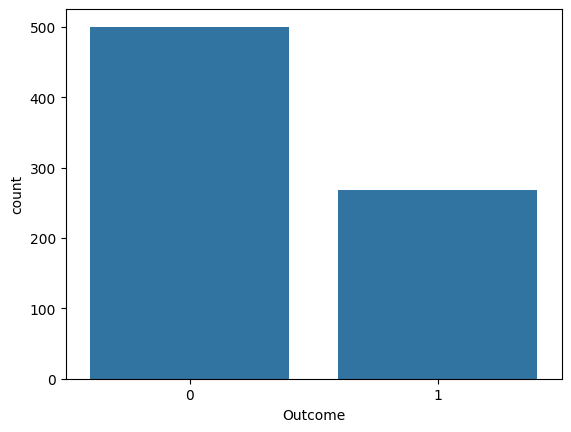

In [111]:
sns.countplot(x='Outcome', data=df)
print('تعداد نتایج برای هر مقدار 0 و 1:\n',
      df['Outcome'].value_counts())

<Axes: >

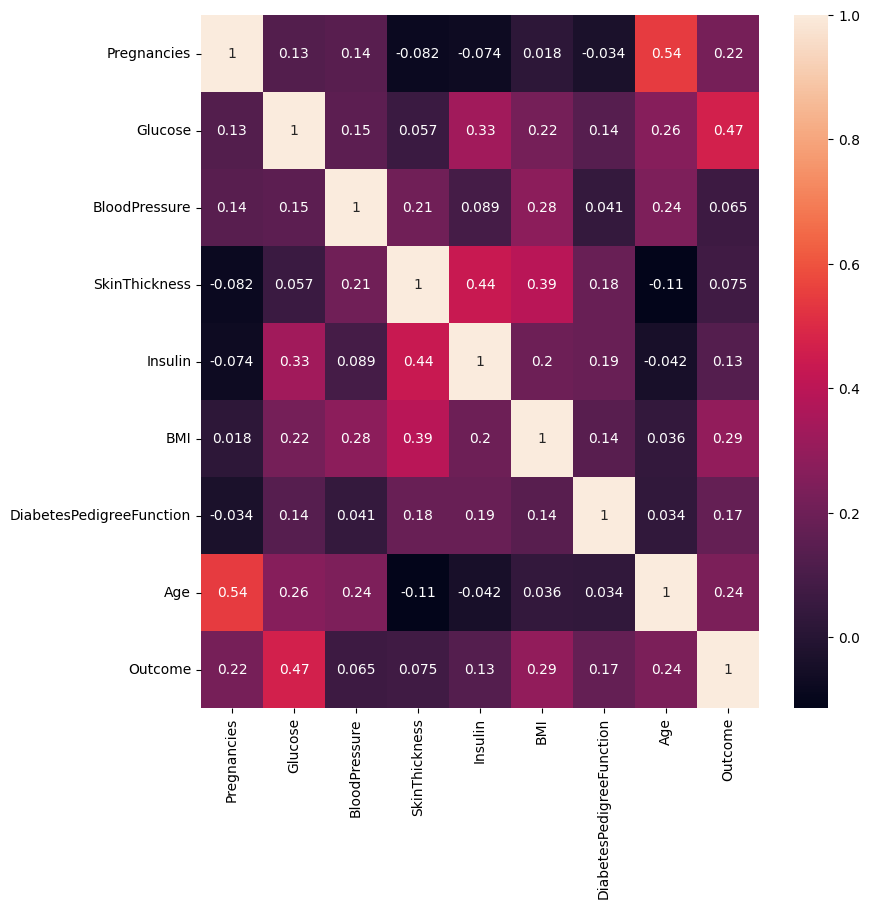

In [112]:
plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True)

In [113]:
x = df.drop("Outcome", axis=1)
y = df.Outcome

In [114]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [115]:
y.shape

(768,)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [117]:
from sklearn import linear_model

In [118]:
model=linear_model.LogisticRegression()
model.fit(X_train,y_train)

C:\Users\aliba\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [120]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [121]:
model.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=200, batch_size=10)

Epoch 1/200
62/62 [==============================] - 1s 5ms/step - loss: 7.2764 - accuracy: 0.6450 - val_loss: 3.3581 - val_accuracy: 0.6234
Epoch 2/200
62/62 [==============================] - 0s 3ms/step - loss: 1.7607 - accuracy: 0.5537 - val_loss: 1.0130 - val_accuracy: 0.5649
Epoch 3/200
62/62 [==============================] - 0s 2ms/step - loss: 0.9283 - accuracy: 0.5375 - val_loss: 0.9271 - val_accuracy: 0.5974
Epoch 4/200
62/62 [==============================] - 0s 3ms/step - loss: 0.8930 - accuracy: 0.5293 - val_loss: 0.8432 - val_accuracy: 0.5844
Epoch 5/200
62/62 [==============================] - 0s 2ms/step - loss: 0.8358 - accuracy: 0.5489 - val_loss: 0.8231 - val_accuracy: 0.5909
Epoch 6/200
62/62 [==============================] - 0s 2ms/step - loss: 0.8083 - accuracy: 0.5749 - val_loss: 0.7635 - val_accuracy: 0.5974
Epoch 7/200
62/62 [==============================] - 0s 2ms/step - loss: 0.7784 - accuracy: 0.5603 - val_loss: 0.7482 - val_accuracy: 0.6039
Epoch 8/200
6

In [122]:
scores = model.evaluate(X_train, y_train)
print("دقت آموزش: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print("دقت تست: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.7834
دقت آموزش: 78.34%

5/5 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7662
دقت تست: 76.62%



In [123]:
y_test_pred = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [124]:
itr = 0
ifa = 0
for ii, i in enumerate(y_test):
    xp = -1
    tf = ""

    if y_test_pred[ii] >= 0.7:
        xp = 1
    else:
        xp = 0

    if i == xp:
        tf = ""
        itr = itr+1
    else:
        tf = "false"
        ifa = ifa+1

In [125]:
print("صحیح:", itr, "  غلط:", ifa)

صحیح: 119   غلط: 35


In [126]:
z = itr+ifa
p = (itr*100)/z
print(p)

77.27272727272727


In [127]:
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 12)                108       
                                                                 
 dense_45 (Dense)            (None, 8)                 104       
                                                                 
 dense_46 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [128]:
man = np.array([[0, 100, 100, 50, 100, 32, 0.2, 56]])
out1 = model.predict(man)

1/1 [==============================] - 0s 49ms/step


In [129]:
print(out1)

[[0.03948866]]


In [130]:
for layer in model.layers:
    print("Layer name: " + layer.name)
    print("Layer type: " + layer.__class__.__name__)
    print("Input dimensions: {}".format(layer.input_shape[1:]))
    print("Output dimensions: {}".format(layer.output_shape[1:]))
    print("Number of parameters: {}".format(layer.count_params()))
    try:
        print("Activation function: " + layer.activation.__name__)
        print(" ")
    except:
        print(" ")

Layer name: dense_44
Layer type: Dense
Input dimensions: (8,)
Output dimensions: (12,)
Number of parameters: 108
Activation function: relu
 
Layer name: dense_45
Layer type: Dense
Input dimensions: (12,)
Output dimensions: (8,)
Number of parameters: 104
Activation function: relu
 
Layer name: dense_46
Layer type: Dense
Input dimensions: (8,)
Output dimensions: (1,)
Number of parameters: 9
Activation function: sigmoid
 


In [131]:
model.save_weights("model.h5")

In [132]:
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [133]:
model.load_weights('model.h5')